In [1]:
import cv2
from pytesseract import Output, pytesseract
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
img = cv2.imread('./OCR_with_Python/Images/test01.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
config_tessract = '--tessdata-dir tessdata'
result = pytesseract.image_to_data(img, config=config_tessract, lang='eng', output_type=Output.DICT)

In [5]:
result['text'], len(result['text'])

(['', '', '', '', 'Testing', 'the', '', 'OCR.', '..'], 9)

In [18]:
def bounding_box(result, img, i, color = (0, 255, 0)):
    x = result['left'][i]
    y = result['top'][i]
    width = result['width'][i]
    height = result['height'][i]

    cv2.rectangle(img, (x, y), (x + width, y + height), color, 2)

    return x, y, img

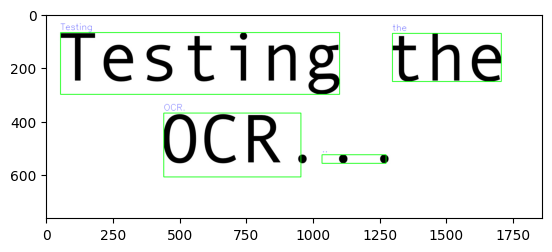

In [24]:
img_copy = img.copy()

min_confidence = 40

for i in range(0, len(result['text'])):
    # print(i)
    confidence = int(result['conf'][i])
    # print(confidence)
    if confidence > min_confidence:
        # print(confidence)
        x, y, img = bounding_box(result, img_copy, i)
        # print(x, y)
        text = result['text'][i]
        # print(text)
        cv2.putText(img_copy, text, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 1.1, (0, 0, 255))

plt.imshow(img_copy)